In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from library.sb_utils import save_file

In [2]:
## Load in cleaned data
lead_data = pd.read_csv('../data/jds_clean_data.csv')

In [3]:
## Check summaries of data
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147222 entries, 0 to 147221
Data columns (total 25 columns):
match_id                   147222 non-null int64
lead_id                    147222 non-null int64
agent_id                   147222 non-null int64
lead_source_id             147222 non-null int64
lead_creation_date         147222 non-null object
matched_at                 147222 non-null object
dial_count                 147222 non-null int64
source_type                147222 non-null object
state                      147222 non-null object
gender                     147222 non-null object
age                        147222 non-null int64
lead_cost                  147222 non-null float64
result                     147222 non-null float64
lead_age_at_acquisition    147222 non-null float64
prepaid_phone              147222 non-null object
phone_in_service           147222 non-null object
email_score                147222 non-null float64
email_valid                147222 non-nul

In [4]:
lead_data.head()

,match_id,lead_id,agent_id,lead_source_id,lead_creation_date,matched_at,dial_count,source_type,state,gender,...,phone_in_service,email_score,email_valid,phone_score,contact_score,block_score,email_reason,contact,quote,app
0,40667,12289,174,8,1/19/2021 12:08,1/19/2021 12:43,1,DELIVERY,AR,Female,...,I2,10.0,1.0,62,36.0,47.948863,0.0,0,0,0
1,144108,30625,176,83,1/22/2021 20:41,1/25/2021 16:03,2,FORM,MS,X,...,A7,95.0,1.0,98,96.5,73.383948,0.0,0,0,0
2,4314,4446,91,50,1/17/2021 18:48,1/18/2021 9:25,3,DELIVERY,WI,Male,...,A7,85.0,1.0,98,91.5,58.877859,0.0,0,0,0
3,89955,20851,228,15,1/20/2021 18:53,1/21/2021 11:17,4,DELIVERY,OK,Female,...,A7,85.0,1.0,99,92.0,55.408187,0.0,0,0,0
4,77985,20544,168,109,1/20/2021 17:57,1/20/2021 17:57,0,FORM,WY,X,...,I1,85.0,1.0,50,67.5,77.281536,0.0,0,0,0


In [5]:
lead_data.shape

(147222, 25)

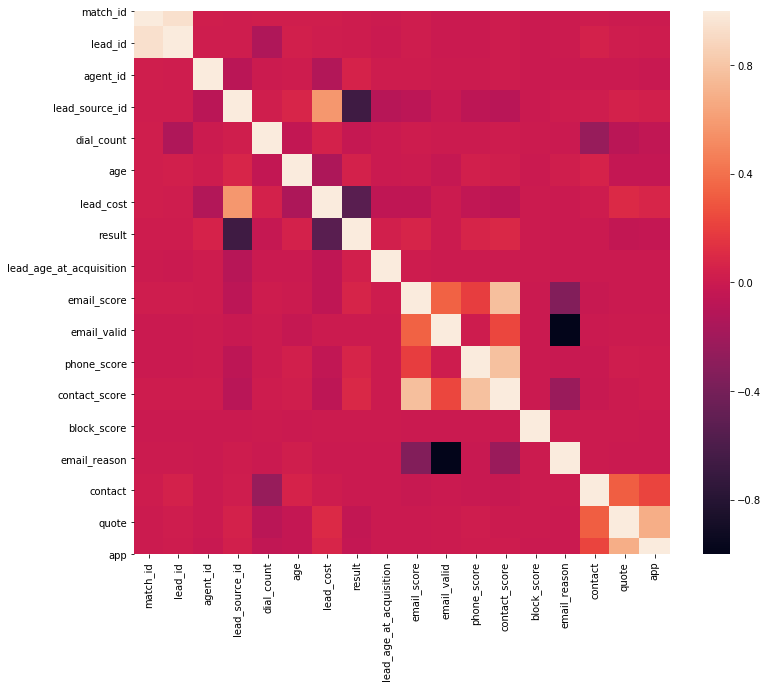

In [6]:
## Heat map to illustrate corelation in lead_data
plt.subplots(figsize=(12,10))
sns.heatmap(lead_data.corr());

In [7]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'app', data=lead_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Application')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

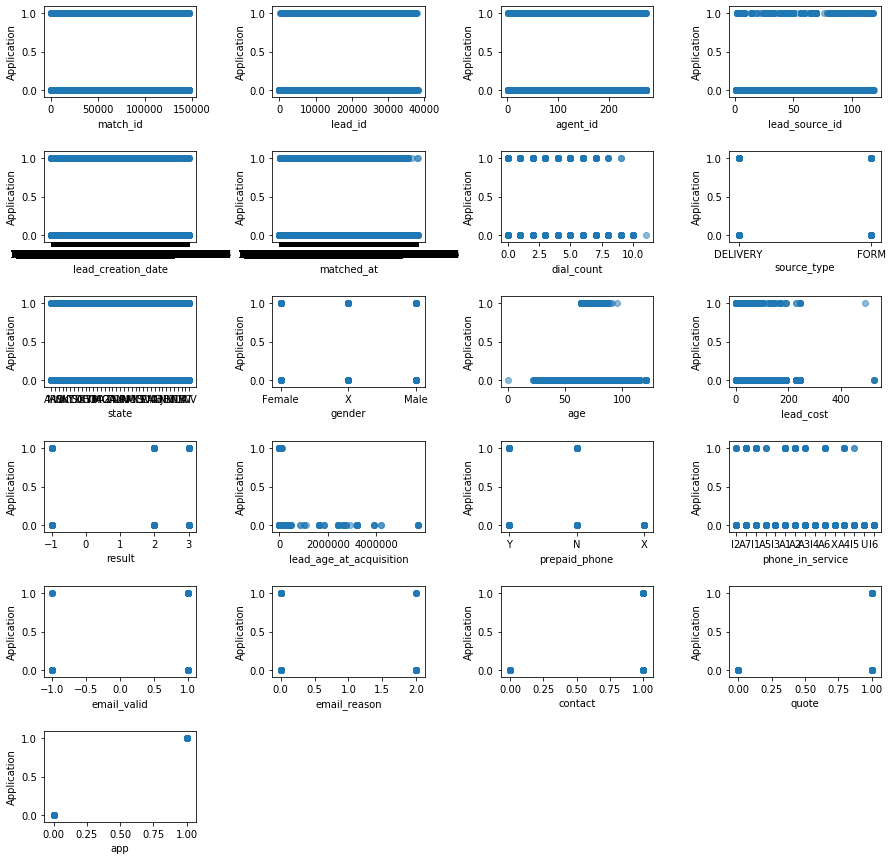

In [9]:
features = [a for a in lead_data.columns if a not in ['email_score', 'phone_score', 'block_score', 'contact_score']]
scatterplots(features, ncol = 4, figsize = (15, 15))

Doesn't seem to be clear correlations. So I will use the scores as features for a K nearest neighbors model.

In [18]:
## Extract dataframe with only key features and identifiers
feature_list = ['match_id', 'lead_id', 'agent_id', 'email_score', 'phone_score', 'contact_score', 'block_score', 'contact', 'app']
feature_data = lead_data.filter(feature_list, axis = 1)
feature_data['block_score'] = feature_data['block_score'].round(3)
feature_data.head()

,match_id,lead_id,agent_id,email_score,phone_score,contact_score,block_score,contact,app
0,40667,12289,174,10.0,62,36.0,47.949,0,0
1,144108,30625,176,95.0,98,96.5,73.384,0,0
2,4314,4446,91,85.0,98,91.5,58.878,0,0
3,89955,20851,228,85.0,99,92.0,55.408,0,0
4,77985,20544,168,85.0,50,67.5,77.282,0,0


In [19]:
feature_data.shape

(147222, 9)

In [20]:
feature_data.to_csv('jds_features.csv', index = False)